<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/SberMarket_Competition/Kondratev_SberMarket_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Описание**


Сервисы доставки еды уже давно перестали быть просто курьерами, которые привозят заказ. Индустрия e-grocery стремительно идет к аккумулированию и использованию больших данных, чтобы знать о своих пользователях больше и предоставлять более качественные и персонализированные услуги. Одним из шагов к такой персонализации может быть разработка модели, которая понимает привычки и нужды пользователя, и, к примеру, может угадать, что и когда пользователь захочет заказать в следующий раз.

Такая модель, будучи разработанной, может принести значительную ценность для клиента - сэкономить время при сборке корзины, помочь ничего не забыть в заказе, убрать необходимость планировать закупки и следить за заканчивающимися запасами продуктов.

В данном соревновании участникам предлагается решить задачу предсказания следующего заказа пользователя (безотносительно конкретного момента времени, когда этот заказ произойдет). Заказ пользователя состоит из списка уникальных категорий товаров, вне зависимости от того, сколько продуктов каждой категории он взял.


## **Набор данных**

В качестве тренировочных данных представляется датасет с историей заказов 20000 пользователей вплоть до даты отсечки, которая разделяет тренировочные и тестовые данные по времени.

**train.csv:**

* user_id - уникальный id пользователя
* order_completed_at - дата заказа
* cart - список уникальных категорий (category_id), из которых состоял заказ

В качестве прогноза необходимо для каждой пары пользователь-категория из примера сабмита вернуть 1, если категория будет присутствовать в следующем заказе пользователя, или 0 в ином случае. Список категорий для каждого пользователя примере сабмита - это все категории, которые он когда-либо заказывал.

**sample_submission.csv:**

Пример сабмита. В тест входят не все пользователи из тренировочных данных, так как некоторые из них так ничего и не заказали после даты отсечки.

* id - идентификатор строки - состоит из user_id и category_id, разделенных
точкой с запятой: f'{user_id};{category_id}'. Из-за особенностей проверяющей системы Kaggle InClass, использовать колонки user_id, category_id в качестве индекса отдельно невозможно
* target - 1 или 0 - будет ли данная категория присутствовать в следующем заказе пользователя


In [ ]:
import pandas as pd

In [ ]:
# Загрузка данных
X = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/SberMarket_Competition/train.csv')
X

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157
...,...,...,...
3123059,12702,2020-09-03 23:45:45,441
3123060,12702,2020-09-03 23:45:45,92
3123061,12702,2020-09-03 23:45:45,431
3123062,12702,2020-09-03 23:45:45,24


In [ ]:
# Убираем столбец order_completed_at
X.drop('order_completed_at', axis=1, inplace=True)

In [ ]:
X

,user_id,cart
0,2,399
1,2,14
2,2,198
3,2,88
4,2,157
...,...,...
3123059,12702,441
3123060,12702,92
3123061,12702,431
3123062,12702,24


In [ ]:
X_small = X

In [ ]:
X_small

,user_id,cart
0,2,399
1,2,14
2,2,198
3,2,88
4,2,157
...,...,...
3123059,12702,441
3123060,12702,92
3123061,12702,431
3123062,12702,24


In [ ]:
# Добавляем столбец target со значениями 1
X_small['target'] = 1

In [ ]:
X_small

,user_id,cart,target
0,2,399,1
1,2,14,1
2,2,198,1
3,2,88,1
4,2,157,1
...,...,...,...
3123059,12702,441,1
3123060,12702,92,1
3123061,12702,431,1
3123062,12702,24,1


In [ ]:
# Создаем новый столбец 'id', объединяя 'user_id' и 'cart', разделенные точкой с запятой
X_small['id'] = X_small.apply(lambda row: f"{row['user_id']};{row['cart']}", axis=1)

X_small

,user_id,cart,target,id
0,2,399,1,2;399
1,2,14,1,2;14
2,2,198,1,2;198
3,2,88,1,2;88
4,2,157,1,2;157
...,...,...,...,...
3123059,12702,441,1,12702;441
3123060,12702,92,1,12702;92
3123061,12702,431,1,12702;431
3123062,12702,24,1,12702;24


In [ ]:
X_small['id_count'] = X_small.groupby('id')['id'].transform('count')
X_small = X_small.groupby('id').first()



In [ ]:
X_small

,user_id,cart,target,id_count
id,,,,
0;10,0,10,1,1
0;133,0,133,1,1
0;14,0,14,1,2
0;157,0,157,1,1
0;169,0,169,1,1
...,...,...,...,...
9;87,9,87,1,2
9;89,9,89,1,1
9;9,9,9,1,33


In [ ]:
import itertools

# Получаем уникальные значения user_id и cart
unique_user_ids = X_small['user_id'].unique()
unique_carts = X_small['cart'].unique()

# Создаем все возможные комбинации user_id и cart
all_combinations = list(itertools.product(unique_user_ids, unique_carts))

# Создаем DataFrame с этими комбинациями
combinations_df = pd.DataFrame(all_combinations, columns=['user_id', 'cart'])

combinations_df

,user_id,cart
0,0,10
1,0,133
2,0,14
3,0,157
4,0,169
...,...,...
17619995,9,459
17619996,9,38
17619997,9,636
17619998,9,348


In [ ]:
combinations_df['id'] = combinations_df.apply(lambda row: f"{row['user_id']};{row['cart']}", axis=1)

combinations_df

,user_id,cart,id
0,0,10,0;10
1,0,133,0;133
2,0,14,0;14
3,0,157,0;157
4,0,169,0;169
...,...,...,...
17619995,9,459,9;459
17619996,9,38,9;38
17619997,9,636,9;636
17619998,9,348,9;348


In [ ]:
merged_X_small = X_small.merge(combinations_df, on='id', how='outer')
merged_X_small

,id,user_id_x,cart_x,target,id_count,user_id_y,cart_y
0,0;10,0.0,10.0,1.0,1.0,0,10
1,0;133,0.0,133.0,1.0,1.0,0,133
2,0;14,0.0,14.0,1.0,2.0,0,14
3,0;157,0.0,157.0,1.0,1.0,0,157
4,0;169,0.0,169.0,1.0,1.0,0,169
...,...,...,...,...,...,...,...
17619995,9;459,NaN,NaN,NaN,NaN,9,459
17619996,9;38,NaN,NaN,NaN,NaN,9,38
17619997,9;636,NaN,NaN,NaN,NaN,9,636
17619998,9;348,NaN,NaN,NaN,NaN,9,348


In [ ]:
merged_X_small['target'].fillna(0, inplace=True)
merged_X_small['id_count'].fillna(0, inplace=True)
merged_X_small

,id,user_id_x,cart_x,target,id_count,user_id_y,cart_y
0,0;10,0.0,10.0,1.0,1.0,0,10
1,0;133,0.0,133.0,1.0,1.0,0,133
2,0;14,0.0,14.0,1.0,2.0,0,14
3,0;157,0.0,157.0,1.0,1.0,0,157
4,0;169,0.0,169.0,1.0,1.0,0,169
...,...,...,...,...,...,...,...
17619995,9;459,NaN,NaN,0.0,0.0,9,459
17619996,9;38,NaN,NaN,0.0,0.0,9,38
17619997,9;636,NaN,NaN,0.0,0.0,9,636
17619998,9;348,NaN,NaN,0.0,0.0,9,348


In [ ]:
merged_X_small = merged_X_small[['id', 'target', 'id_count', 'user_id_y', 'cart_y']]

merged_X_small

,id,target,id_count,user_id_y,cart_y
0,0;10,1.0,1.0,0,10
1,0;133,1.0,1.0,0,133
2,0;14,1.0,2.0,0,14
3,0;157,1.0,1.0,0,157
4,0;169,1.0,1.0,0,169
...,...,...,...,...,...
17619995,9;459,0.0,0.0,9,459
17619996,9;38,0.0,0.0,9,38
17619997,9;636,0.0,0.0,9,636
17619998,9;348,0.0,0.0,9,348


In [ ]:
merged_X_small.columns = ['id', 'target', 'id_count', 'user_id', 'cart']

In [ ]:
merged_X_small

,id,target,id_count,user_id,cart
0,0;10,1.0,1.0,0,10
1,0;133,1.0,1.0,0,133
2,0;14,1.0,2.0,0,14
3,0;157,1.0,1.0,0,157
4,0;169,1.0,1.0,0,169
...,...,...,...,...,...
17619995,9;459,0.0,0.0,9,459
17619996,9;38,0.0,0.0,9,38
17619997,9;636,0.0,0.0,9,636
17619998,9;348,0.0,0.0,9,348


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

In [ ]:
X_s = merged_X_small[['id_count', 'user_id', 'cart', 'target']]

In [ ]:
"""
warnings.filterwarnings("ignore")

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_s)
    inertia.append(kmeans.inertia_)
"""

'\nwarnings.filterwarnings("ignore")\n\ninertia = []\nfor k in range(1, 10):\n    kmeans = KMeans(n_clusters=k, random_state=0)\n    kmeans.fit(X_s)\n    inertia.append(kmeans.inertia_)\n'

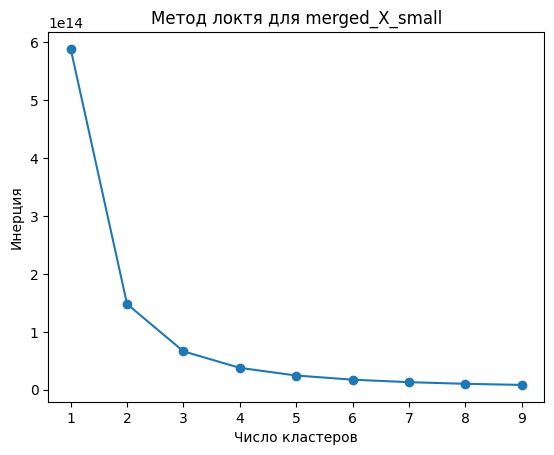

In [ ]:
"""
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для merged_X_small')
plt.show()
"""

In [ ]:
X_s

,id_count,user_id,cart,target
0,1.0,0,10,1.0
1,1.0,0,133,1.0
2,2.0,0,14,1.0
3,1.0,0,157,1.0
4,1.0,0,169,1.0
...,...,...,...,...
17619995,0.0,9,459,0.0
17619996,0.0,9,38,0.0
17619997,0.0,9,636,0.0
17619998,0.0,9,348,0.0


In [ ]:
warnings.filterwarnings("ignore")

optimal_n_clusters = 3
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0)
merged_X_small['cluster'] = kmeans.fit_predict(X_s)

In [ ]:
merged_X_small

,id,target,id_count,user_id,cart,cluster
0,0;10,1.0,1.0,0,10,2
1,0;133,1.0,1.0,0,133,2
2,0;14,1.0,2.0,0,14,2
3,0;157,1.0,1.0,0,157,2
4,0;169,1.0,1.0,0,169,2
...,...,...,...,...,...,...
17619995,9;459,0.0,0.0,9,459,2
17619996,9;38,0.0,0.0,9,38,2
17619997,9;636,0.0,0.0,9,636,2
17619998,9;348,0.0,0.0,9,348,2


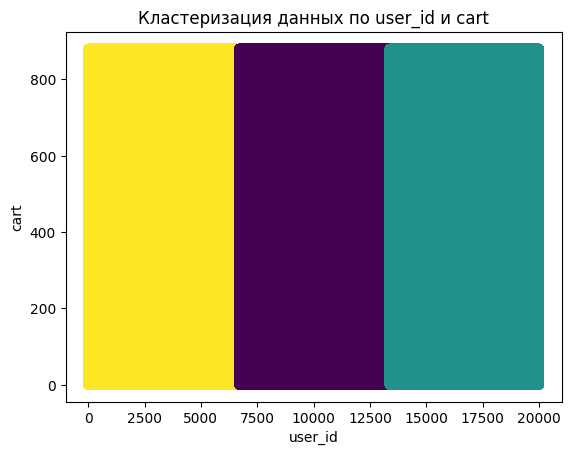

In [ ]:
"""
# визуализация кластеров
plt.scatter(merged_X_small['user_id'], merged_X_small['cart'], c=merged_X_small['cluster'], cmap='viridis')
plt.xlabel('user_id')
plt.ylabel('cart')
plt.title('Кластеризация данных по user_id и cart')
plt.show()
"""

In [ ]:
X = merged_X_small[['id_count', 'user_id', 'cart', 'cluster']]
y = merged_X_small['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Добавление предсказаний в новый столбец 'predictions'
merged_X_small['predictions'] = model.predict(X)

In [ ]:
merged_X_small

,id,target,id_count,user_id,cart,cluster,predictions
0,0;10,1.0,1.0,0,10,2,1.0
1,0;133,1.0,1.0,0,133,2,1.0
2,0;14,1.0,2.0,0,14,2,1.0
3,0;157,1.0,1.0,0,157,2,1.0
4,0;169,1.0,1.0,0,169,2,1.0
...,...,...,...,...,...,...,...
17619995,9;459,0.0,0.0,9,459,2,0.0
17619996,9;38,0.0,0.0,9,38,2,0.0
17619997,9;636,0.0,0.0,9,636,2,0.0
17619998,9;348,0.0,0.0,9,348,2,0.0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Истинные значения 'target' из новых данных
true_values = merged_X_small['target']

# Предсказания модели
predicted_values = merged_X_small['predictions']

# Вычисление MSE и R^2
mse = mean_squared_error(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)

print(f'MSE на новых данных: {mse}')
print(f'R^2 на новых данных: {r2}')

MSE на новых данных: 0.0
R^2 на новых данных: 1.0


In [ ]:
# Загрузка данных
sub_df = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/SberMarket_Competition/sample_submission.csv')
sub_df

,id,target
0,0;133,0
1,0;5,1
2,0;10,0
3,0;396,1
4,0;14,0
...,...,...
790444,19998;26,0
790445,19998;31,0
790446,19998;29,1
790447,19998;798,1


In [ ]:
# Объединение DataFrame по столбцу 'id' и оставление только строк, соответствующих sub_df
final_df = pd.merge(merged_X_small, sub_df, on='id', how='inner')

In [ ]:
final_df

,id,target_x,id_count,user_id,cart,cluster,predictions,target_y
0,0;10,1.0,1.0,0,10,2,1.0,0
1,0;133,1.0,1.0,0,133,2,1.0,0
2,0;14,1.0,2.0,0,14,2,1.0,0
3,0;157,1.0,1.0,0,157,2,1.0,0
4,0;169,1.0,1.0,0,169,2,1.0,0
...,...,...,...,...,...,...,...,...
790444,9;87,1.0,2.0,9,87,2,1.0,0
790445,9;89,1.0,1.0,9,89,2,1.0,0
790446,9;9,1.0,33.0,9,9,2,1.0,0
790447,9;96,1.0,1.0,9,96,2,1.0,0


In [ ]:
# Удаление лишних столбцов из DataFrame final_df
final_df = final_df.drop(['target_x', 'predictions', 'target_y'], axis=1)

final_df

,id,id_count,user_id,cart,cluster
0,0;10,1.0,0,10,2
1,0;133,1.0,0,133,2
2,0;14,2.0,0,14,2
3,0;157,1.0,0,157,2
4,0;169,1.0,0,169,2
...,...,...,...,...,...
790444,9;87,2.0,9,87,2
790445,9;89,1.0,9,89,2
790446,9;9,33.0,9,9,2
790447,9;96,1.0,9,96,2


In [ ]:
# Подготовка данных для предсказания на новых данных
X_final = final_df[['id_count', 'user_id', 'cart', 'cluster']]

# Делаем предсказания на новых данных и сразу переименовываем столбец
final_df['target'] = model.predict(X_final)

final_df

,id,id_count,user_id,cart,cluster,target
0,0;10,1.0,0,10,2,1.0
1,0;133,1.0,0,133,2,1.0
2,0;14,2.0,0,14,2,1.0
3,0;157,1.0,0,157,2,1.0
4,0;169,1.0,0,169,2,1.0
...,...,...,...,...,...,...
790444,9;87,2.0,9,87,2,1.0
790445,9;89,1.0,9,89,2,1.0
790446,9;9,33.0,9,9,2,1.0
790447,9;96,1.0,9,96,2,1.0


In [ ]:
# Оставляем только столбцы 'id' и 'target' в DataFrame final_df
final_df = final_df[['id', 'target']]

final_df

,id,target
0,0;10,1.0
1,0;133,1.0
2,0;14,1.0
3,0;157,1.0
4,0;169,1.0
...,...,...
790444,9;87,1.0
790445,9;89,1.0
790446,9;9,1.0
790447,9;96,1.0


In [ ]:
# Сохраняем DataFrame 'final_df' в CSV файл
final_df.to_csv('final_predictions.csv', index=False)

In [ ]:
from google.colab import files
files.download('final_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>